1. Load and Explore the Data
2. Handle Missing Values
3. Handle Categorical Data
4. Feature Scaling(for some optional)
5. Outlier Detection and Removal
6. Feature Engineering (Optional)

# Importing Libraries

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Data

In [99]:
#Import Ames House Dataset
df= pd.read_csv("Titanic.csv")

In [100]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#PassengerId: A unique identifier for each passenger.
#Pclass: The ticket class (1 = First class, 2 = Second class, 3 = Third class).
#Name: The full name of the passenger.
#Sex: The gender of the passenger (male or female).
#Age: The age of the passenger in years (may contain missing values).
#SibSp: The number of siblings or spouses the passenger had aboard the Titanic.
#Parch: The number of parents or children the passenger had aboard the Titanic.
#Ticket: The ticket number assigned to the passenger.
#Fare: The fare paid by the passenger for the ticket.
#Cabin: The cabin number assigned to the passenger (may contain missing values).
#Embarked: The port where the passenger boarded the Titanic


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [102]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [103]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#age==>86 missing value from 418
#cabin==>327 missing value from 418

In [104]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Handling Missing values

In [105]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [106]:
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [107]:
df.drop("Cabin", axis=1, inplace=True)

In [108]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Handling Categorical Data

In [109]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [110]:
#one hot encoding
df= pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [111]:
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,True,False
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,False,True
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,True,False
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,False,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,False,True
5,897,0,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,False,True
6,898,1,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,True,False
7,899,0,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,False,True


# Outlier detection and removal

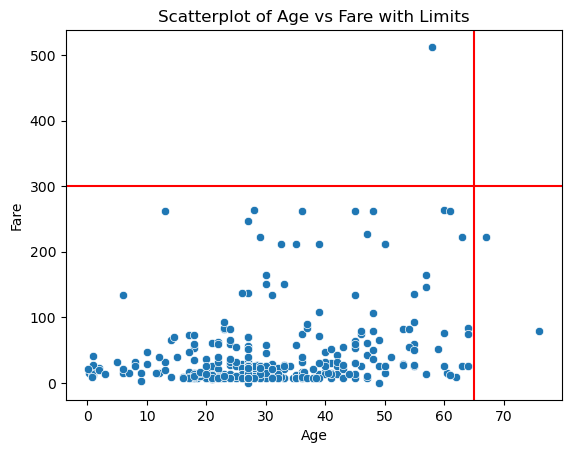

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot for Age vs Fare
sns.scatterplot(data=df, x="Age", y="Fare")
plt.axhline(y=300, color="r")  # Upper limit for Fare
plt.axvline(x=65, color="r")  # Upper limit for Age
plt.title('Scatterplot of Age vs Fare with Limits')
plt.show()


In [115]:
df[(df['Fare']>300) | (df["Age"]>65)][["Fare","Age"]]

,Fare,Age
81,221.7792,67.0
96,78.8500,76.0
343,512.3292,58.0


In [116]:
index_drop=df[(df['Fare']>300) | (df["Age"]>65)].index

df=df.drop(index_drop,axis=0)# axis=0 hazfe satr

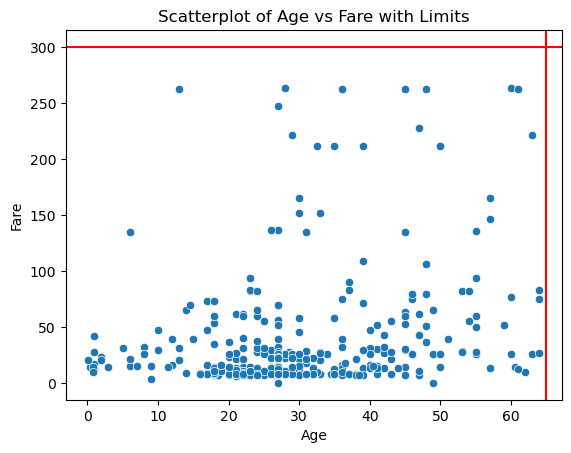

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot for Age vs Fare
sns.scatterplot(data=df, x="Age", y="Fare")
plt.axhline(y=300, color="r")  # Upper limit for Fare
plt.axvline(x=65, color="r")  # Upper limit for Age
plt.title('Scatterplot of Age vs Fare with Limits')
plt.show()


# IQR

In [119]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows with outliers
outliers = ((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)

# Extract rows with outliers
df_outliers = df[outliers]

# Remove rows with outliers (cleaned dataset)
df_cleaned = df[~outliers].copy()

# Display results
print(f"Original dataset shape: {df.shape}")
print(f"Outliers dataset shape: {df_outliers.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

Original dataset shape: (415, 12)
Outliers dataset shape: (135, 12)
Cleaned dataset shape: (280, 12)


## Using Visualization (Boxplots)

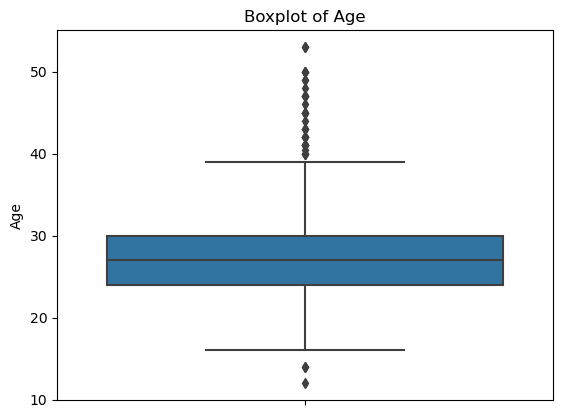

In [125]:
sns.boxplot(data=df_cleaned, y='Age')
plt.title("Boxplot of Age")
plt.show()


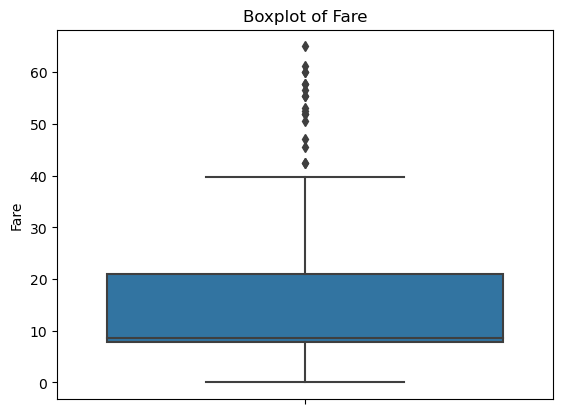

In [126]:
sns.boxplot(data=df_cleaned, y='Fare')
plt.title("Boxplot of Fare")
plt.show()

# Feature Engineering

# New Features

In [128]:
# Create a new feature FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [129]:
#one person or no
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


In [130]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,True,False,1,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,False,True,2,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,True,False,1,1
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,False,True,1,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,False,True,3,0


# converting features to differnt branches

In [131]:
# Create Age Groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                                        labels=['Child', 'Teenager', 'YoungAdult', 'Adult', 'Senior'])

In [132]:
# Create Fare Groups
df['FareGroup'] = pd.cut(df['Fare'], bins=[0, 7.91, 14.454, 31, 1000], 
                                         labels=['Low', 'Medium', 'High', 'VeryHigh'])


# Deleting past features

In [134]:
# Drop unnecessary columns
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [135]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone,AgeGroup,FareGroup
0,892,0,3,"Kelly, Mr. James",0,34.5,330911,7.8292,True,False,1,1,YoungAdult,Low
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,363272,7.0000,False,True,2,0,Adult,Low
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,240276,9.6875,True,False,1,1,Senior,Medium
3,895,0,3,"Wirz, Mr. Albert",0,27.0,315154,8.6625,False,True,1,1,YoungAdult,Medium
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,3101298,12.2875,False,True,3,0,YoungAdult,Medium
